In [1]:
'''
HURDAT - Classification model - Identify the best model
'''

'\nHURDAT - Classification model - Identify the best model\n'

In [58]:
import pandas as pd
import numpy as np 
import sys

#machine learning
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_validate
#machine learning algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#metrics
from sklearn.metrics import confusion_matrix



# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


sys.path.append('../')

In [69]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
def solution():
    
    #Loading the data
    train=pd.read_csv('res/training/Pacific_train.csv')
    test=pd.read_csv('res/validation/Pacific_test.csv')
    #datatype of columns
    #print(train.dtypes)
    #print(train.head())
    
    #Find unique outcomes of target column
    #print(train['Status'].unique())
    
    #get all null values in the data
    #print(train.isnull().sum())
    
    #describe the data field
    #print(train.describe())
    #print(test.describe())
    
    #********Write your code here***************
    #*******************************************
    #*******************************************
    
    #Find unique outcomes of target column
    print(train['Status'].unique())
    
    #get all null values in the data
    print(train.isnull().sum())
    print(test.isnull().sum())
    
    #Label encoding the target field
    le=LabelEncoder()
    train['Status']=le.fit_transform(train['Status'])
    test['Status']=le.fit_transform(test['Status'])
    #print(train.head())
    #print(test.head())
    print(train['Status'].unique())
    print(test['Status'].unique())
    
    #describe the data field
    print(train.describe())
    #print(test.describe())
    
    train.hist(figsize=(15,15))
    plt.show()
    
    #Outliers Detection
    #train[['Maximum Wind']].boxplot(figsize=(10,15))
    #train[['Minimum Pressure']].boxplot(figsize=(10,15))
    #train[['Low Wind NE']].boxplot(figsize=(10,15))
    #plt.show()
    
    #Correlation Matix to view relationship
    correlation = train.corr()
    correlation

    print(train.columns)
    
    #Test Train Data 
    X_train = train[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]
    X_test = test[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]
    y_train = train[['Status']]
    y_test = test[['Status']]
    #print(X_train.shape)
    #print(X_test.shape)
    #print(y_train.shape)
    #print(y_test.shape)
    
    models=[]
    models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
    models.append(('SVC',SVC(gamma='auto')))
    models.append(('GaussianNB',GaussianNB()))
    models.append(('RandomForestClassifier',RandomForestClassifier()))
    model_stats={}

    for name,model in models:
        kfold=KFold(n_splits=10,random_state=7) 

        cross_val=cross_validate(model,X_train,y_train,scoring=['accuracy','recall_micro','precision_micro'],cv=kfold)
        acc = round(cross_val['test_accuracy'].mean(),5)
        rec = round(cross_val['test_recall_micro'].mean(),5)
        pre = round(cross_val['test_precision_micro'].mean(),5)
        print(name,acc,rec,pre)
        model_stats[name] = [acc,rec,pre]

    model_final = sorted((value,key) for (key,value) in model_stats.items())[3]
    
    result=[model_final[1],round(model_final[0][0],2)]
    result=pd.DataFrame(result)
    #writing output to output.csv
    result.to_csv('output/output.csv', header=False, index=False)
    
solution()

In [15]:
#Loading the data
train=pd.read_csv('res/training/Pacific_train.csv')
test=pd.read_csv('res/validation/Pacific_test.csv')

In [17]:
#datatype of columns
print(train.dtypes)
print(train.head())

ID                  object
Name                object
Date                 int64
Time                 int64
Event               object
Status              object
Latitude            object
Longitude           object
Maximum Wind         int64
Minimum Pressure     int64
Low Wind NE          int64
Low Wind SE          int64
Low Wind SW          int64
Low Wind NW          int64
Moderate Wind NE     int64
Moderate Wind SE     int64
Moderate Wind SW     int64
Moderate Wind NW     int64
High Wind NE         int64
High Wind SE         int64
High Wind SW         int64
High Wind NW         int64
dtype: object
         ID                 Name      Date  Time Event Status Latitude  \
0  EP101996            GENEVIEVE  19961003     0           TD    15.0N   
1  EP101988                 JOHN  19880817  1200           TD    18.6N   
2  EP061951              UNNAMED  19510827     0           TS    22.5N   
3  EP101987                 JOVA  19870814  1200           TS    12.8N   
4  EP142007           

In [18]:
#Find unique outcomes of target column
print(train['Status'].unique())

[' TD' ' TS' ' LO' ' HU' ' ET' ' EX' ' DB' ' SS' ' PT' ' ST' ' SD']


In [29]:
#get all null values in the data
print(train.isnull().sum())
print(test.isnull().sum())

ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64
ID                  0
Name                0
Date                0
Time                0
Event               0
Status              0
Latitude            0
Longitude           0
Maximum Wind        0
Minimum Pressure    0
Low Wind NE         0
Low Wind SE         0
Low Wind SW         0
Low Wind NW         0
Moderate Wind NE    0
Moderate Wind SE    0
Moderate Wind SW    0
Moderate Wind NW    0
High Wind NE        0
High Wind SE        0
High Wind SW        0
High Wind NW        0
dtype: int64


In [36]:
#Label encoding the target field
le=LabelEncoder()
train['Status']=le.fit_transform(train['Status'])
test['Status']=le.fit_transform(test['Status'])
#print(train.head())
#print(test.head())
print(train['Status'].unique())
print(test['Status'].unique())

[ 9 10  4  3  1  2  0  7  5  8  6]
[ 9 10  3  4  2  0  1  8  6  5  7]


In [98]:
#describe the data field
print(train.describe())
#print(test.describe())

               Date          Time        Status  Maximum Wind  \
count  1.568100e+04  15681.000000  15681.000000  15681.000000   
mean   1.988869e+07    895.129137      7.334162     48.902175   
std    1.689375e+05    670.861199      3.142766     25.384266   
min    1.949061e+07      0.000000      0.000000     10.000000   
25%    1.976080e+07      0.000000      3.000000     30.000000   
50%    1.990072e+07    600.000000      9.000000     45.000000   
75%    2.003091e+07   1200.000000     10.000000     65.000000   
max    2.015113e+07   2300.000000     10.000000    185.000000   

       Minimum Pressure   Low Wind NE   Low Wind SE   Low Wind SW  \
count      15681.000000  15681.000000  15681.000000  15681.000000   
mean          12.517378   -745.436579   -746.734966   -748.654805   
std          997.093589    446.917373    444.515036    440.969695   
min         -999.000000   -999.000000   -999.000000   -999.000000   
25%         -999.000000   -999.000000   -999.000000   -999.000000   


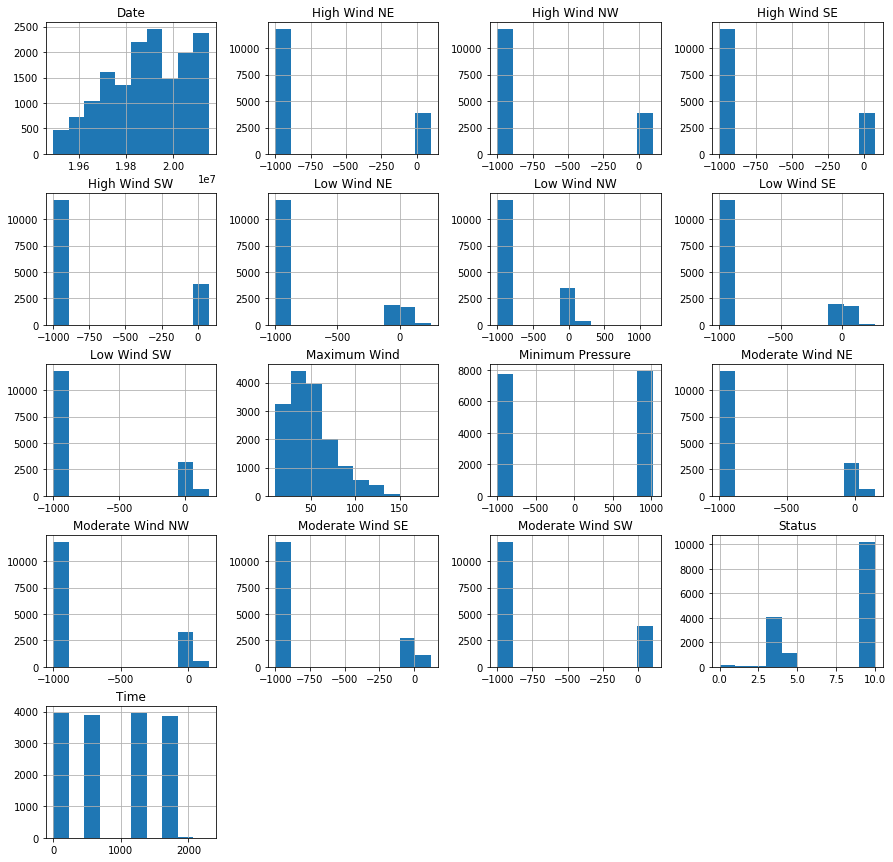

In [56]:
train.hist(figsize=(15,15))
plt.show()

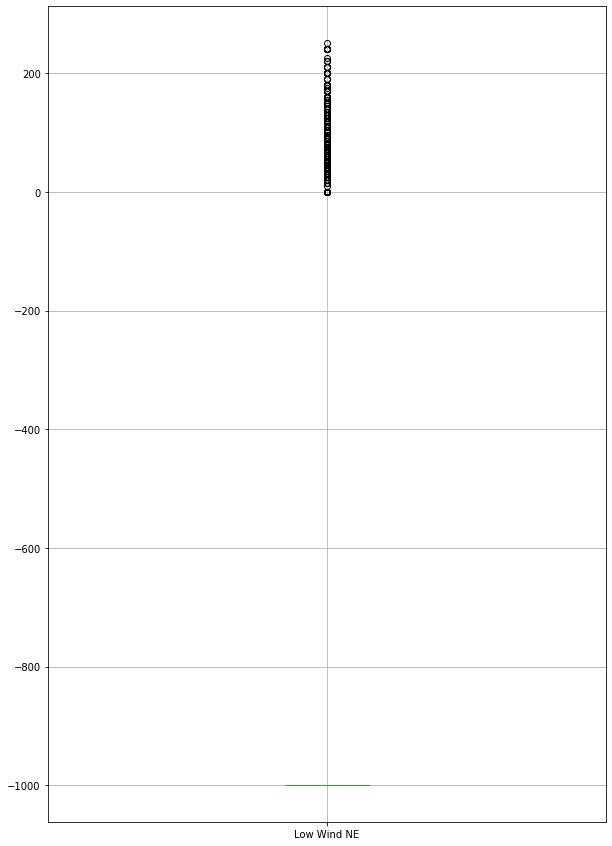

In [48]:
#Outliers Detection
#train[['Maximum Wind']].boxplot(figsize=(10,15))
#train[['Minimum Pressure']].boxplot(figsize=(10,15))
train[['Low Wind NE']].boxplot(figsize=(10,15))
plt.show()

In [51]:
#Correlation Matix to view relationship
correlation = train.corr()
correlation

,Date,Time,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
Date,1.000000,0.013585,-0.083893,-0.100092,0.792029,0.712848,0.712842,0.712659,0.712499,0.713245,0.713244,0.713184,0.713205,0.713300,0.713291,0.713270,0.713282
Time,0.013585,1.000000,0.004621,-0.003257,0.027134,0.007138,0.007087,0.006978,0.007284,0.007030,0.007024,0.007037,0.006982,0.006995,0.007045,0.007062,0.007007
Status,-0.083893,0.004621,1.000000,-0.576719,-0.086269,-0.150328,-0.151046,-0.151591,-0.150479,-0.154353,-0.154176,-0.153869,-0.154311,-0.153696,-0.153190,-0.152511,-0.153243
Maximum Wind,-0.100092,-0.003257,-0.576719,1.000000,-0.050730,-0.083837,-0.085763,-0.089288,-0.086191,-0.093524,-0.094988,-0.096661,-0.094815,-0.099167,-0.100023,-0.101078,-0.099882
Minimum Pressure,0.792029,0.027134,-0.086269,-0.050730,1.000000,0.559870,0.560037,0.560296,0.559863,0.560619,0.560685,0.560753,0.560681,0.560851,0.560878,0.560908,0.560874
Low Wind NE,0.712848,0.007138,-0.150328,-0.083837,0.559870,1.000000,0.999704,0.999496,0.999484,0.999350,0.999243,0.999129,0.999244,0.998955,0.998897,0.998823,0.998904
Low Wind SE,0.712842,0.007087,-0.151046,-0.085763,0.560037,0.999704,1.000000,0.999755,0.999192,0.999489,0.999460,0.999342,0.999399,0.999172,0.999132,0.999065,0.999125
Low Wind SW,0.712659,0.006978,-0.151591,-0.089288,0.560296,0.999496,0.999755,1.000000,0.999219,0.999666,0.999668,0.999622,0.999639,0.999466,0.999438,0.999394,0.999435
Low Wind NW,0.712499,0.007284,-0.150479,-0.086191,0.559863,0.999484,0.999192,0.999219,1.000000,0.999125,0.999038,0.998968,0.999073,0.998819,0.998771,0.998712,0.998784
Moderate Wind NE,0.713245,0.007030,-0.154353,-0.093524,0.560619,0.999350,0.999489,0.999666,0.999125,1.000000,0.999957,0.999922,0.999963,0.999865,0.999836,0.999801,0.999841


In [37]:
print(train.columns)

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')


In [60]:
X_train = train[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]
X_test = test[['Maximum Wind', 'Minimum Pressure', 'Low Wind NE']]
y_train = train[['Status']]
y_test = test[['Status']]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15681, 3)
(10455, 3)
(15681, 1)
(10455, 1)


In [82]:
models=[]
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SVC',SVC(gamma='auto')))
models.append(('GaussianNB',GaussianNB()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
model_stats={}

for name,model in models:
    kfold=KFold(n_splits=10,random_state=7) 
    
    cross_val=cross_validate(model,X_train,y_train,scoring=['accuracy','recall_micro','precision_micro'],cv=kfold)
    acc = round(cross_val['test_accuracy'].mean(),5)
    rec = round(cross_val['test_recall_micro'].mean(),5)
    pre = round(cross_val['test_precision_micro'].mean(),5)
    print(name,acc,rec,pre)
    model_stats[name] = [acc,rec,pre]



DecisionTreeClassifier 0.95676 0.95676 0.95676
SVC 0.95096 0.95096 0.95096
GaussianNB 0.40571 0.40571 0.40571
RandomForestClassifier 0.95734 0.95734 0.95734
{'DecisionTreeClassifier': [0.95676, 0.95676, 0.95676], 'SVC': [0.95096, 0.95096, 0.95096], 'GaussianNB': [0.40571, 0.40571, 0.40571], 'RandomForestClassifier': [0.95734, 0.95734, 0.95734]}
[([0.40571, 0.40571, 0.40571], 'GaussianNB'), ([0.95096, 0.95096, 0.95096], 'SVC'), ([0.95676, 0.95676, 0.95676], 'DecisionTreeClassifier'), ([0.95734, 0.95734, 0.95734], 'RandomForestClassifier')]


In [84]:
print(model_stats)

{'DecisionTreeClassifier': [0.95676, 0.95676, 0.95676], 'SVC': [0.95096, 0.95096, 0.95096], 'GaussianNB': [0.40571, 0.40571, 0.40571], 'RandomForestClassifier': [0.95734, 0.95734, 0.95734]}


In [92]:
model_final = sorted((value,key) for (key,value) in model_stats.items())[3]

In [93]:
print(model_final[1])

RandomForestClassifier


In [97]:
print(round(model_final[0][0],2))

0.96
